In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.feature_selection import mutual_info_classif

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
df = pd.read_csv(r'data\raw\Bio-Signal-Analysis.zip',compression='zip')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

- Checking the object columns

In [5]:
for col in df.select_dtypes(include='O'):
    print(df[col].value_counts(),'\n')

gender
M    35401
F    20291
Name: count, dtype: int64 

oral
Y    55692
Name: count, dtype: int64 

tartar
Y    30940
N    24752
Name: count, dtype: int64 



In [6]:
# No null values present
df.isnull().sum().sum()

0

In [7]:
# No duplicates
df.duplicated().sum()

0

In [8]:
# Descriptive statistics (numeric features) 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [9]:
# Descriptive statistics (object type features)
df.describe(include='O')

,gender,oral,tartar
count,55692,55692,55692
unique,2,1,2
top,M,Y,Y
freq,35401,55692,30940


We will remove two features from the dataset:
- `'ID'` : Because it is not useful information for machine learning
- `'oral'` : Since oral contains only a single value 'Y' throught the entire dataset. A feature with constant value will not contribute to the model's ability to predict the target variable

In [10]:
df.drop(['ID','oral'],axis=1,inplace=True)

**Data visualization**

In [11]:
# Checking the skewness of each numerical feature
df.select_dtypes(exclude='O').iloc[:,:-1].skew()

age                     0.268053
height(cm)             -0.142238
weight(kg)              0.534042
waist(cm)               0.242390
eyesight(left)          9.987651
eyesight(right)        10.059531
hearing(left)           6.009185
hearing(right)          5.939591
systolic                0.469780
relaxation              0.394602
fasting blood sugar     4.509412
Cholesterol             0.392355
triglyceride            1.313403
HDL                     1.955282
LDL                    10.673511
hemoglobin             -0.655237
Urine protein           5.625088
serum creatinine        9.401928
AST                    25.147528
ALT                    34.686797
Gtp                     6.744798
dental caries           1.399563
dtype: float64

- Checking the distribution of each numerical columns

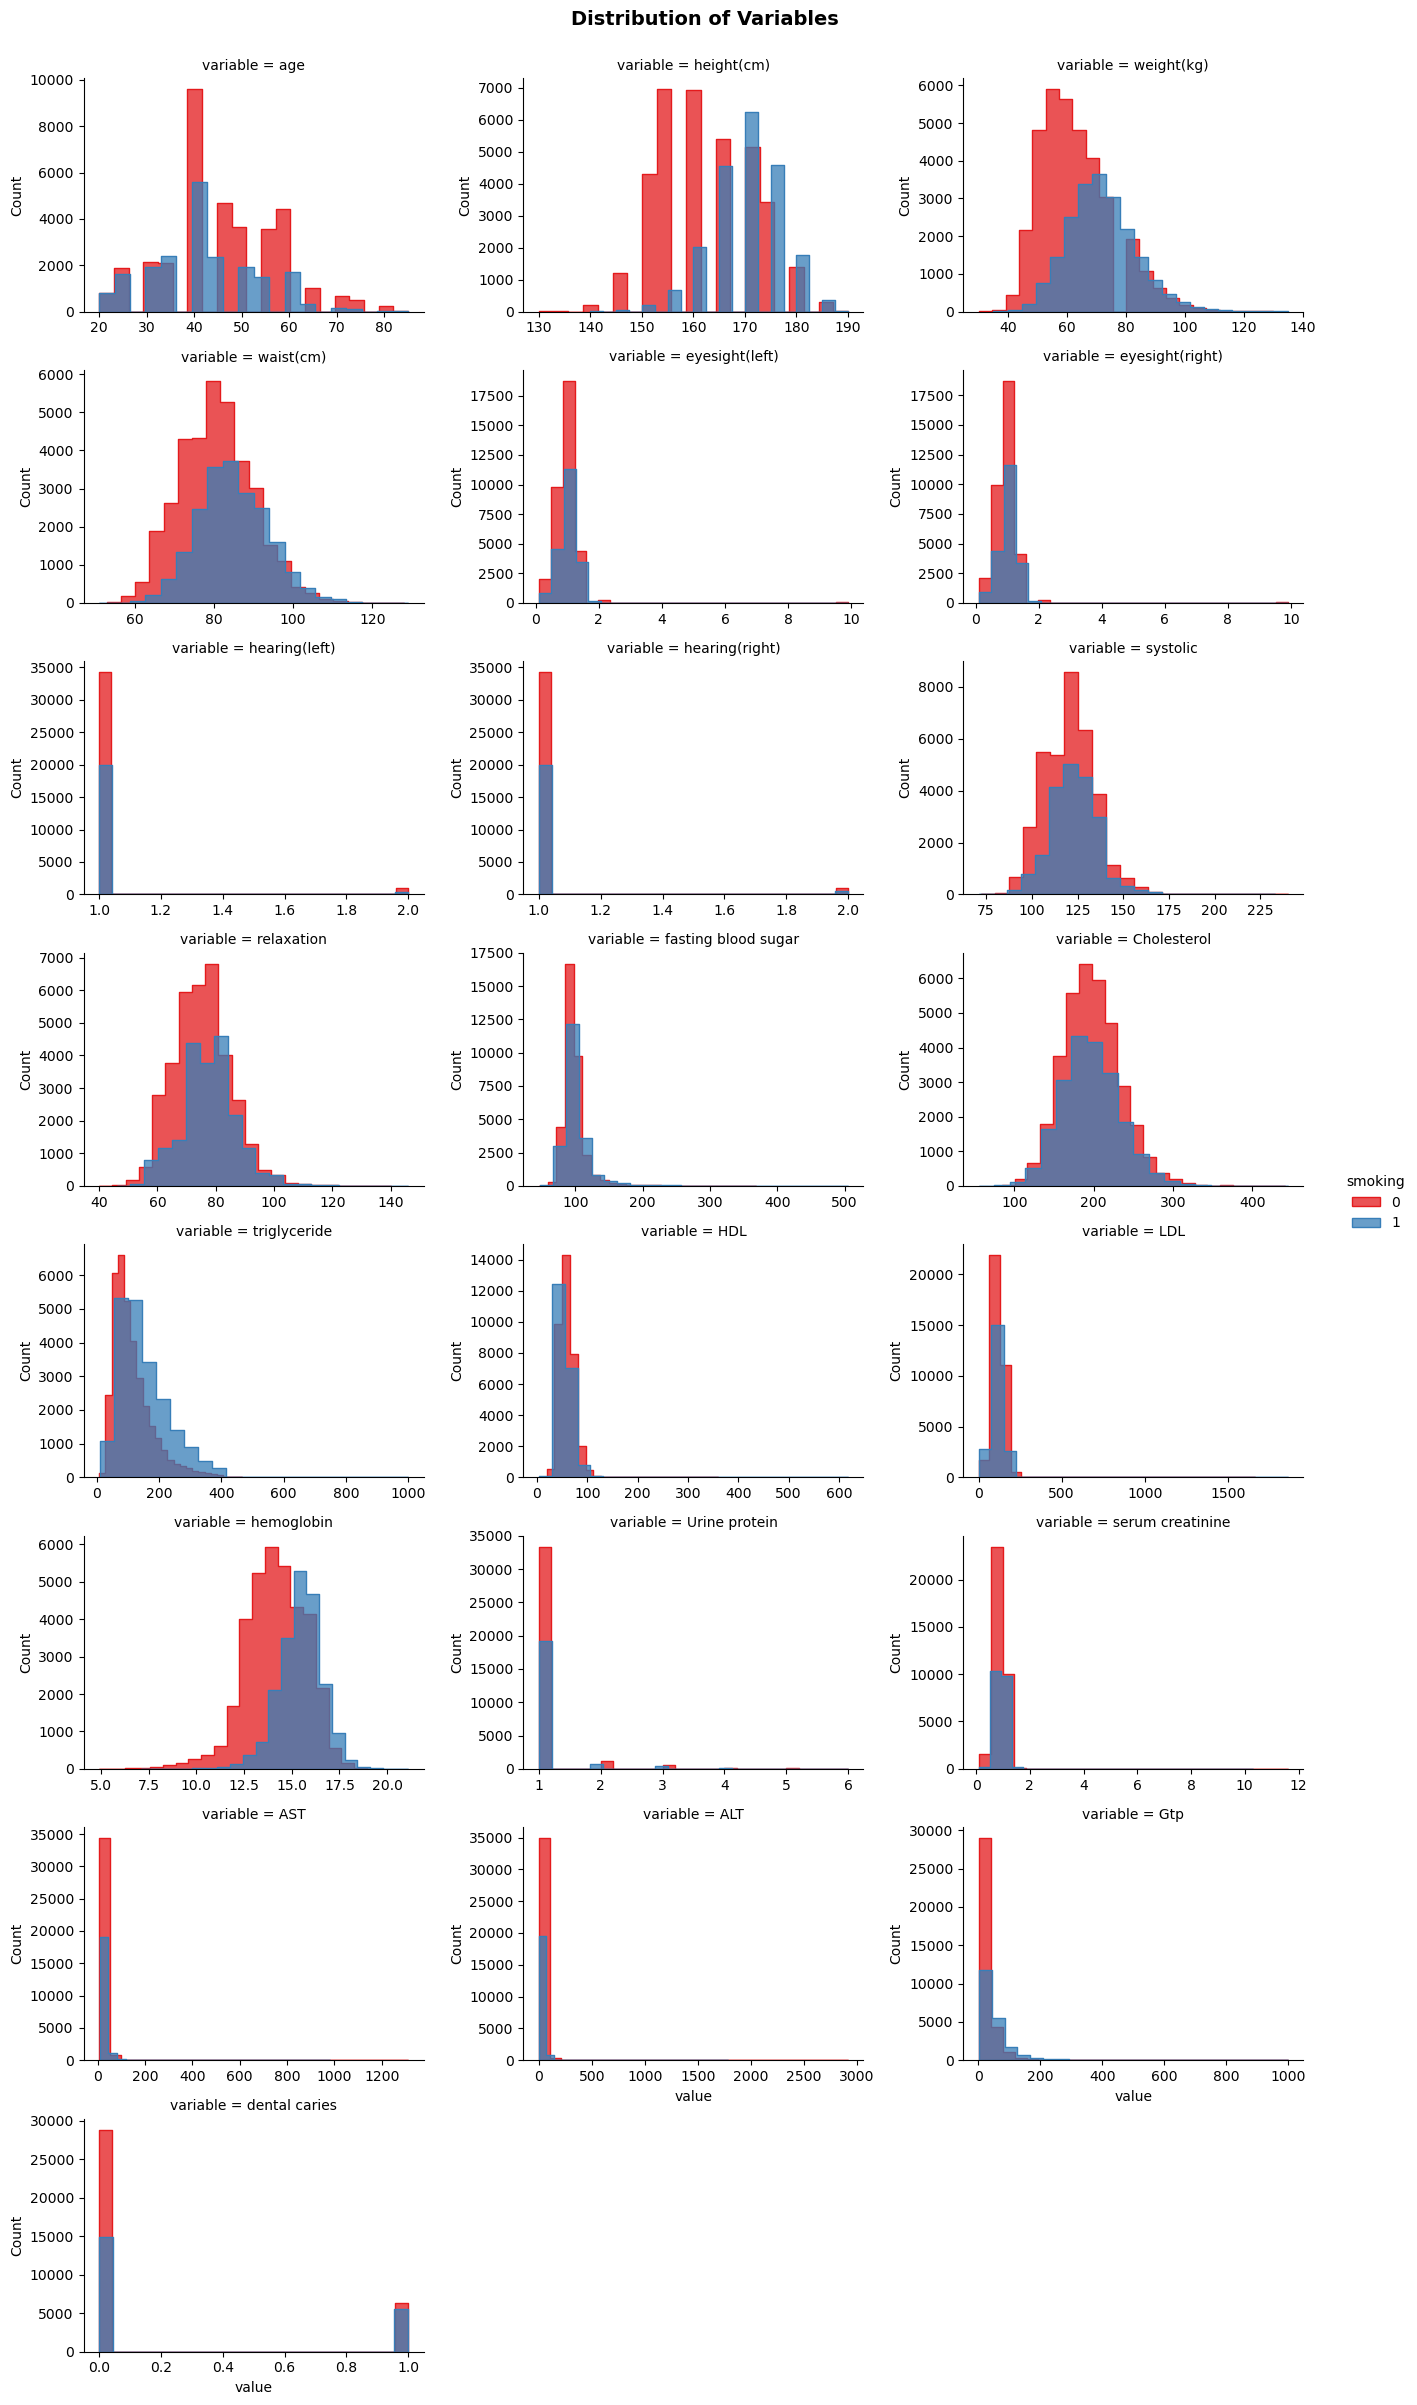

In [20]:
df_melt = df.melt(id_vars='smoking',value_vars=[col for col in df.columns if col not in ['tartar','gender']])

hist_bi = sb.FacetGrid(df_melt, col='variable', col_wrap=3, sharex=False, sharey=False, hue='smoking', palette='Set1', aspect=1.5)
hist_bi.map_dataframe(sb.histplot, x='value', bins='doane', element='step')
hist_bi.add_legend()
hist_bi.figure.suptitle('Distribution of Variables', fontweight='bold', y=1, fontsize=14)
hist_bi.tight_layout();

- Also checking if any outliers are present. Since the dataset is large, we will use a boxenplot for better representation
- `Also even if many outliers are present, it will be left as is because, these are True outliers that represent the natural variations in population`

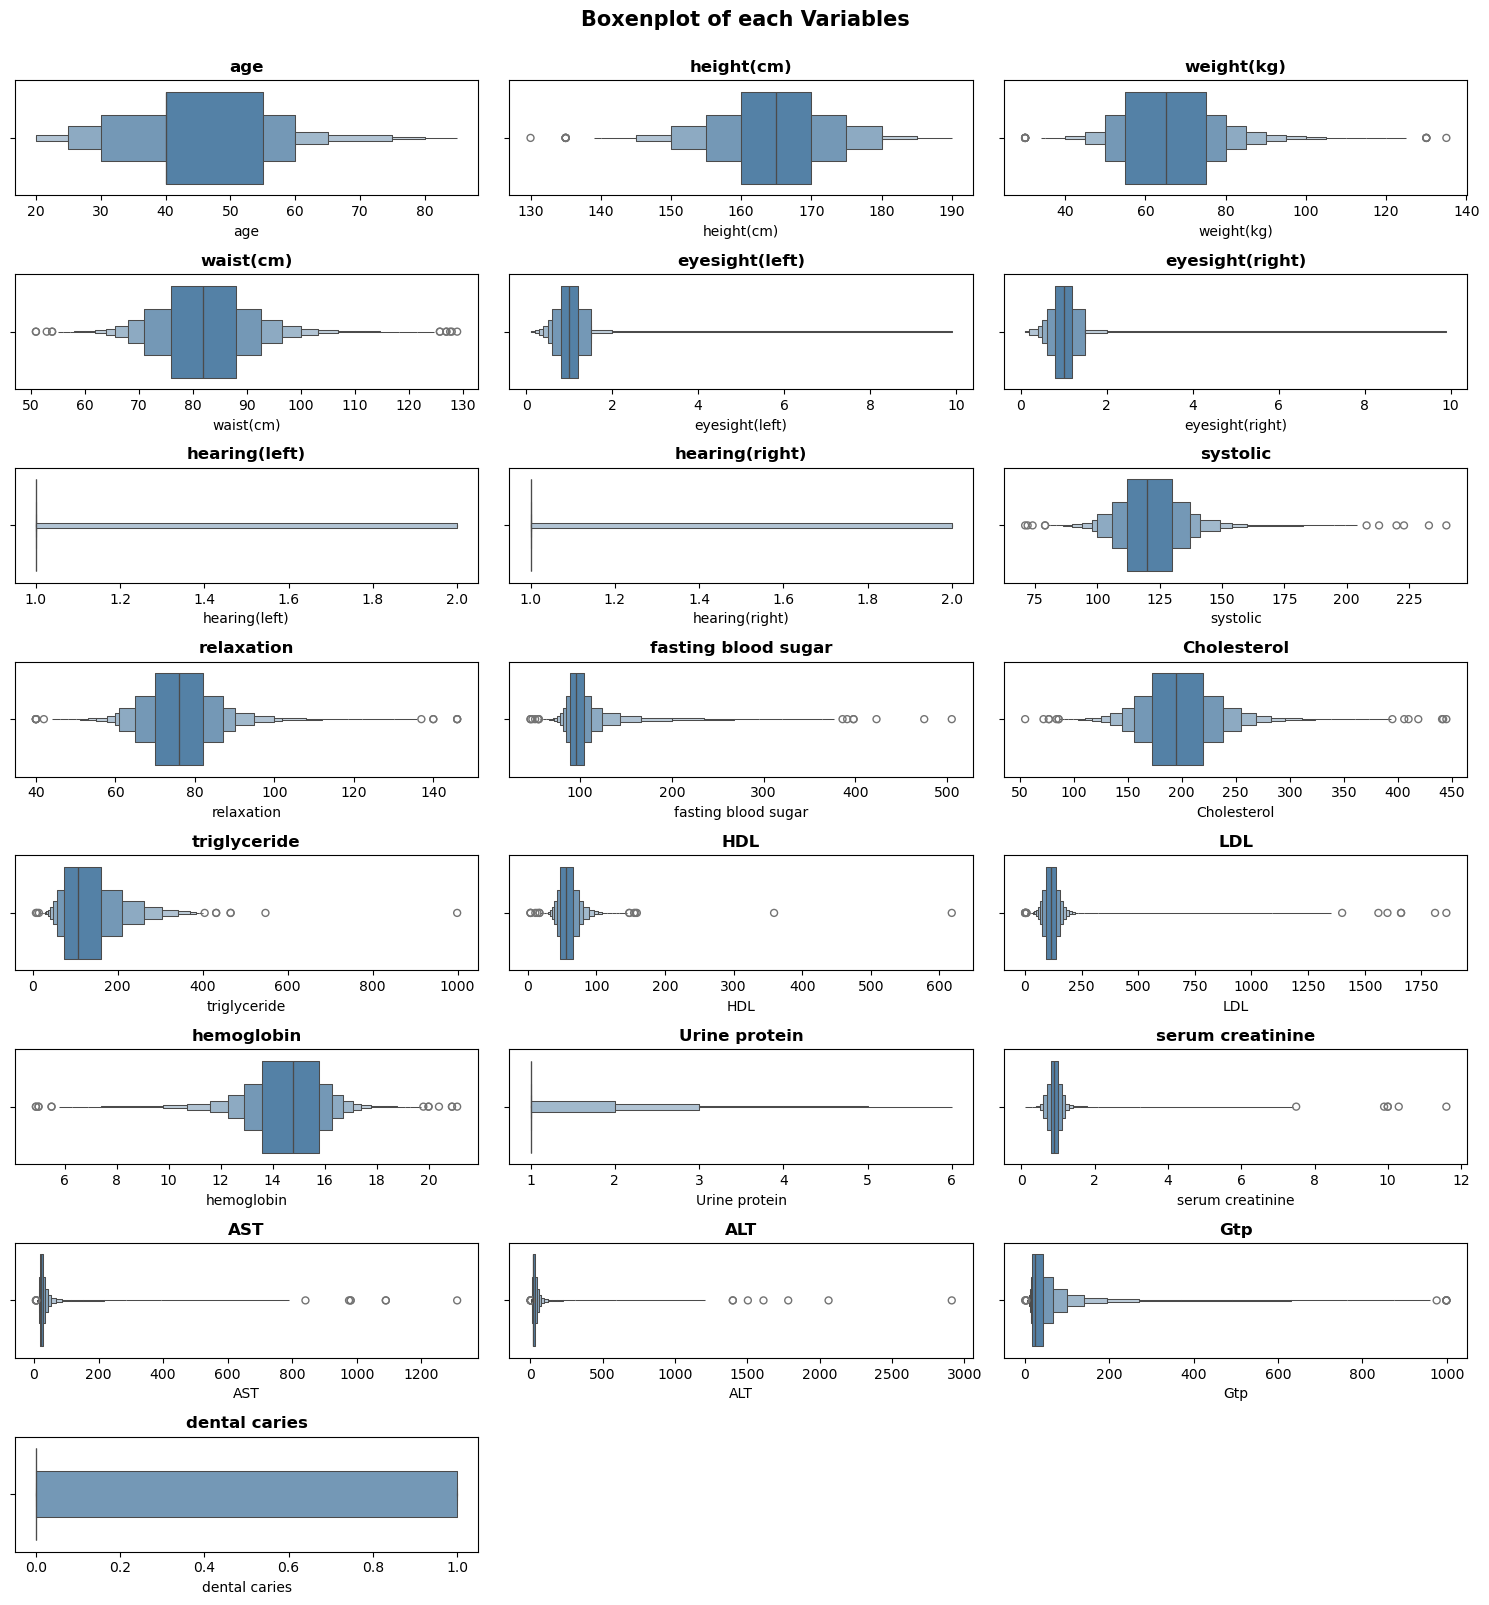

In [36]:
plt.figure(figsize=(15,8*2))
for i,col in enumerate(df.select_dtypes(include='number').iloc[:,:-1]):
    plt.subplot(8,3,i+1)
    sb.boxenplot(df[col],color='steelblue',orient='h')
    plt.title(f'{col}',fontweight='bold')
plt.suptitle('Boxenplot of each Variables',fontweight='bold',y=1,fontsize=15)
plt.tight_layout();

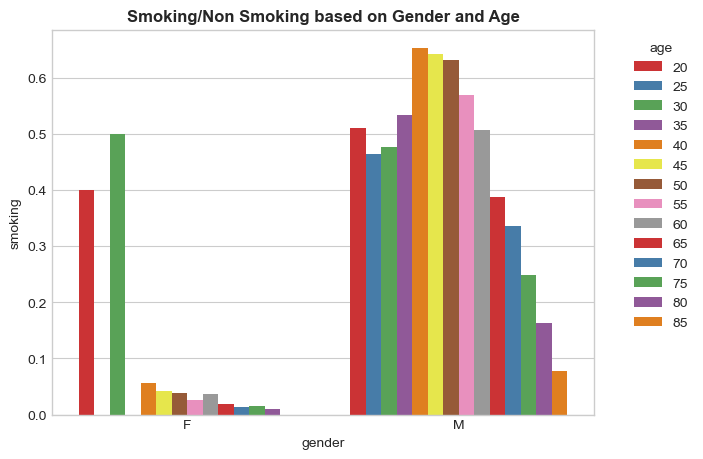

In [77]:
plt.figure(figsize=(7,5))
sb.barplot(data=df,x='gender',y='smoking',hue='age',palette='Set1',legend='auto',errorbar=None)
plt.title('Smoking/Non Smoking based on Gender and Age',fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='age');

- Based on the plot, most of the smokers are men
- There are much leeser number of them among women
- Majority of smokers among women are between ages 20 and 30

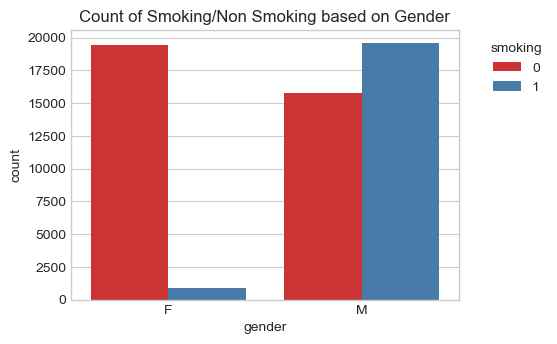

In [78]:
plt.figure(figsize=(5,3.5))
sb.countplot(data=df,x='gender',hue='smoking',palette='Set1')
plt.title('Count of Smoking/Non Smoking based on Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='smoking');

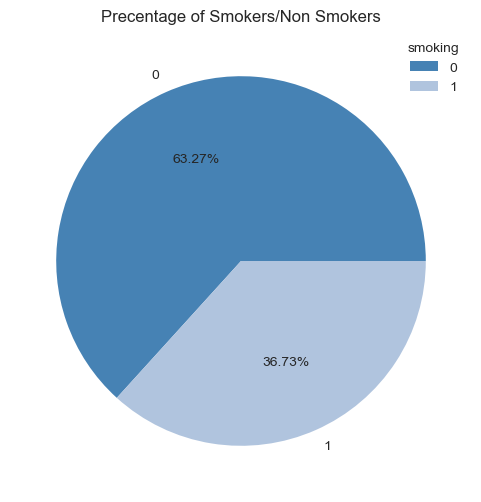

In [79]:
plt.figure(figsize=(6,6))
df['smoking'].value_counts().plot.pie(autopct='%0.2f%%',colors=['steelblue', 'lightsteelblue'])
plt.title('Precentage of Smokers/Non Smokers')
plt.ylabel('')
plt.legend(title='smoking');

- The classes are imbalanced

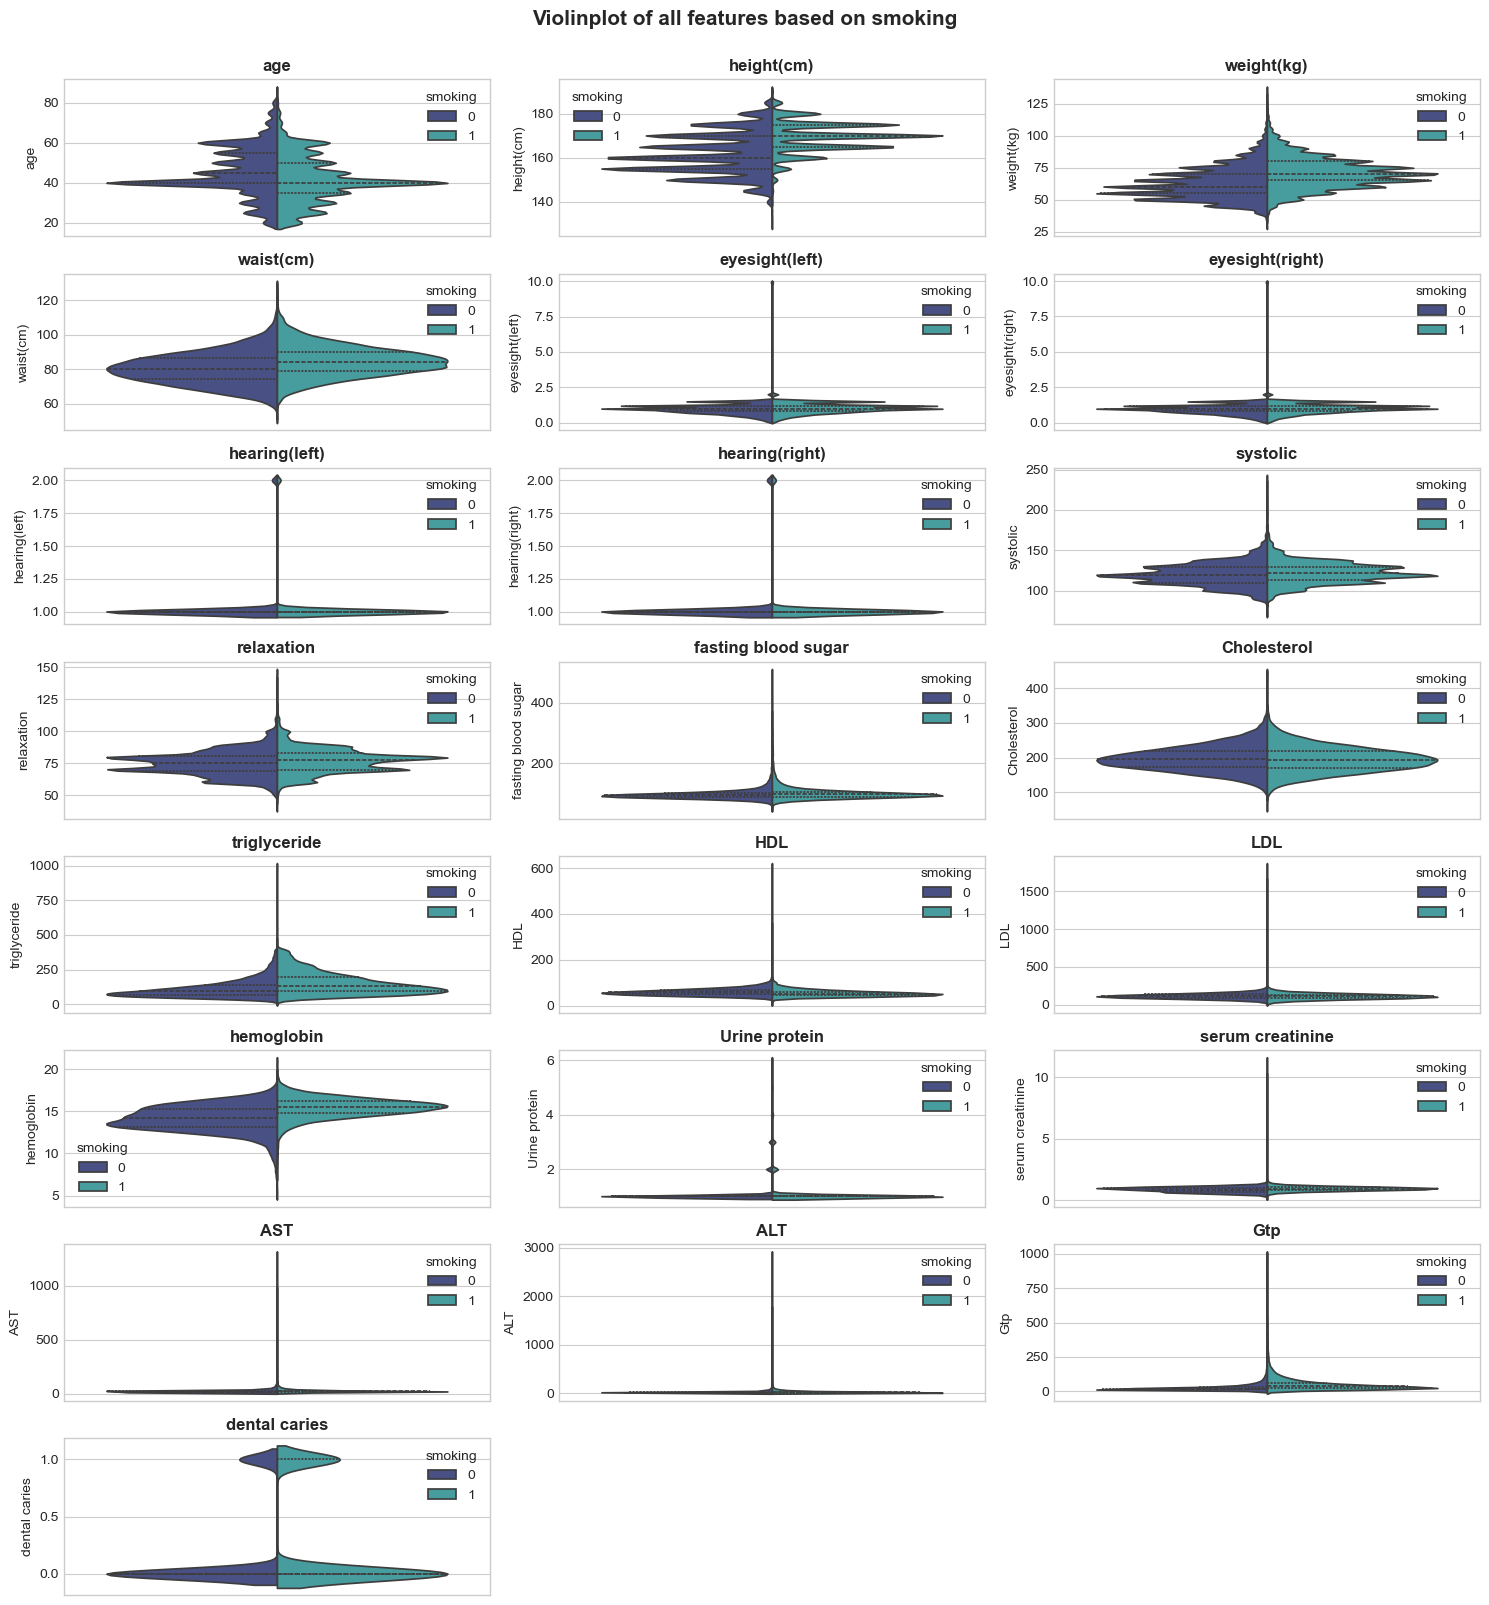

In [80]:
plt.figure(figsize=(15,8*2))
for i,col in enumerate(df.select_dtypes(include='number').iloc[:,:-1]):
    plt.subplot(8,3,i+1)
    sb.violinplot(data=df, y=col, hue='smoking', split=True, inner='quartiles', density_norm='count', palette='mako')
    plt.title(f'{col}',fontweight='bold')
plt.suptitle('Violinplot of all features based on smoking',fontweight='bold',y=1,fontsize=15)
plt.tight_layout();

- The above plot shows probability density of each feature based on smoking or non smoking
- It also shows that IQR region for each feature based on smoking or non smoking
- Also show other factors like skewness, kurtosis and mutimodality (if present) for each feature

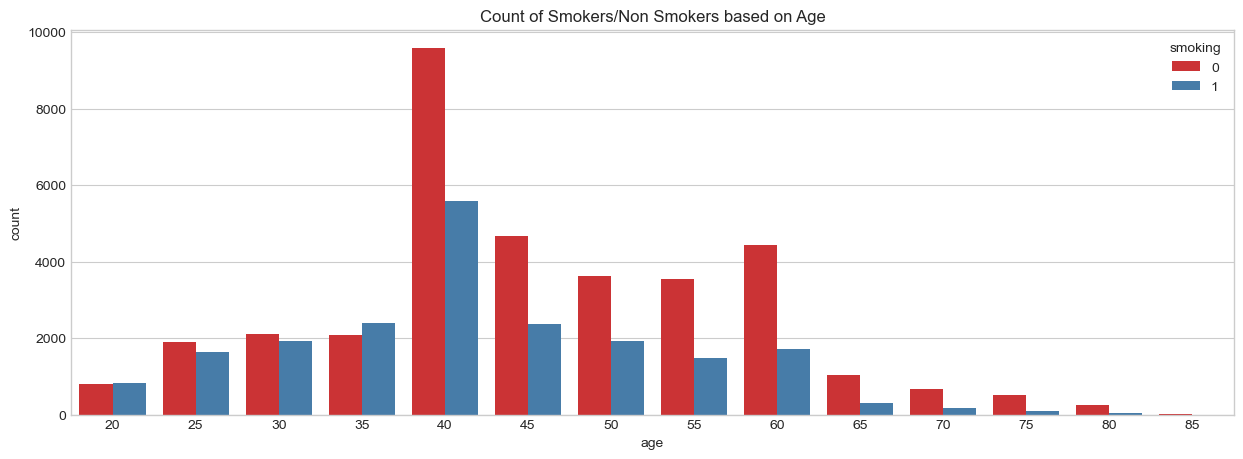

In [81]:
plt.figure(figsize=(15,5))
sb.countplot(data=df,x='age',hue='smoking',palette='Set1')
plt.title('Count of Smokers/Non Smokers based on Age');

- Majority of smokers are in age 40

- We will check the mutual information (MI) between the features and the targte variable
- MI is a positive values that quantifies, how much knowing one feature reduce the uncertainty about another feature. It is univariate metric
- We will get the MI score for all the feature variables against the target variable

In [11]:
# Making a copy
df_mi = df.copy(deep=True)

# Encoding the categorical columns
for col in df_mi.select_dtypes(include='O'):
    df_mi[col], _ = df_mi[col].factorize()

# Data for mutual_info_classif function
discrete_cols = [df[col].dtype == 'O' for col in df.columns[:-1]]
X = df_mi
y = df_mi.pop('smoking')

# Getting the mutual information for all the features against target variable
mi = mutual_info_classif(X,y,discrete_features=discrete_cols)

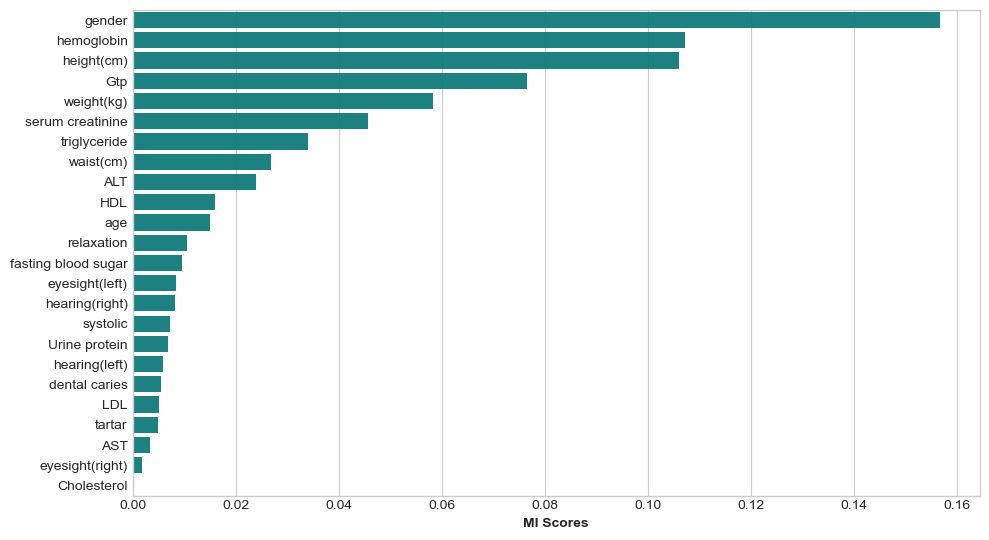

In [53]:
# Visualizing using horizontal barplot
# mi = pd.Series(mi,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5.5))
sb.barplot(y=mi.index,x=mi,color='darkcyan',alpha=0.95)
plt.xlabel('MI Scores',fontweight='bold')
plt.ylabel('')
plt.tight_layout();

- We will remove Cholesterol since it has 0 MI score

In [14]:
df.drop('Cholesterol',axis=1,inplace=True)

- Lets check the pairwise relation ship of the top 7 numerical variables (acoording to MI scores)

<Figure size 2000x2000 with 0 Axes>

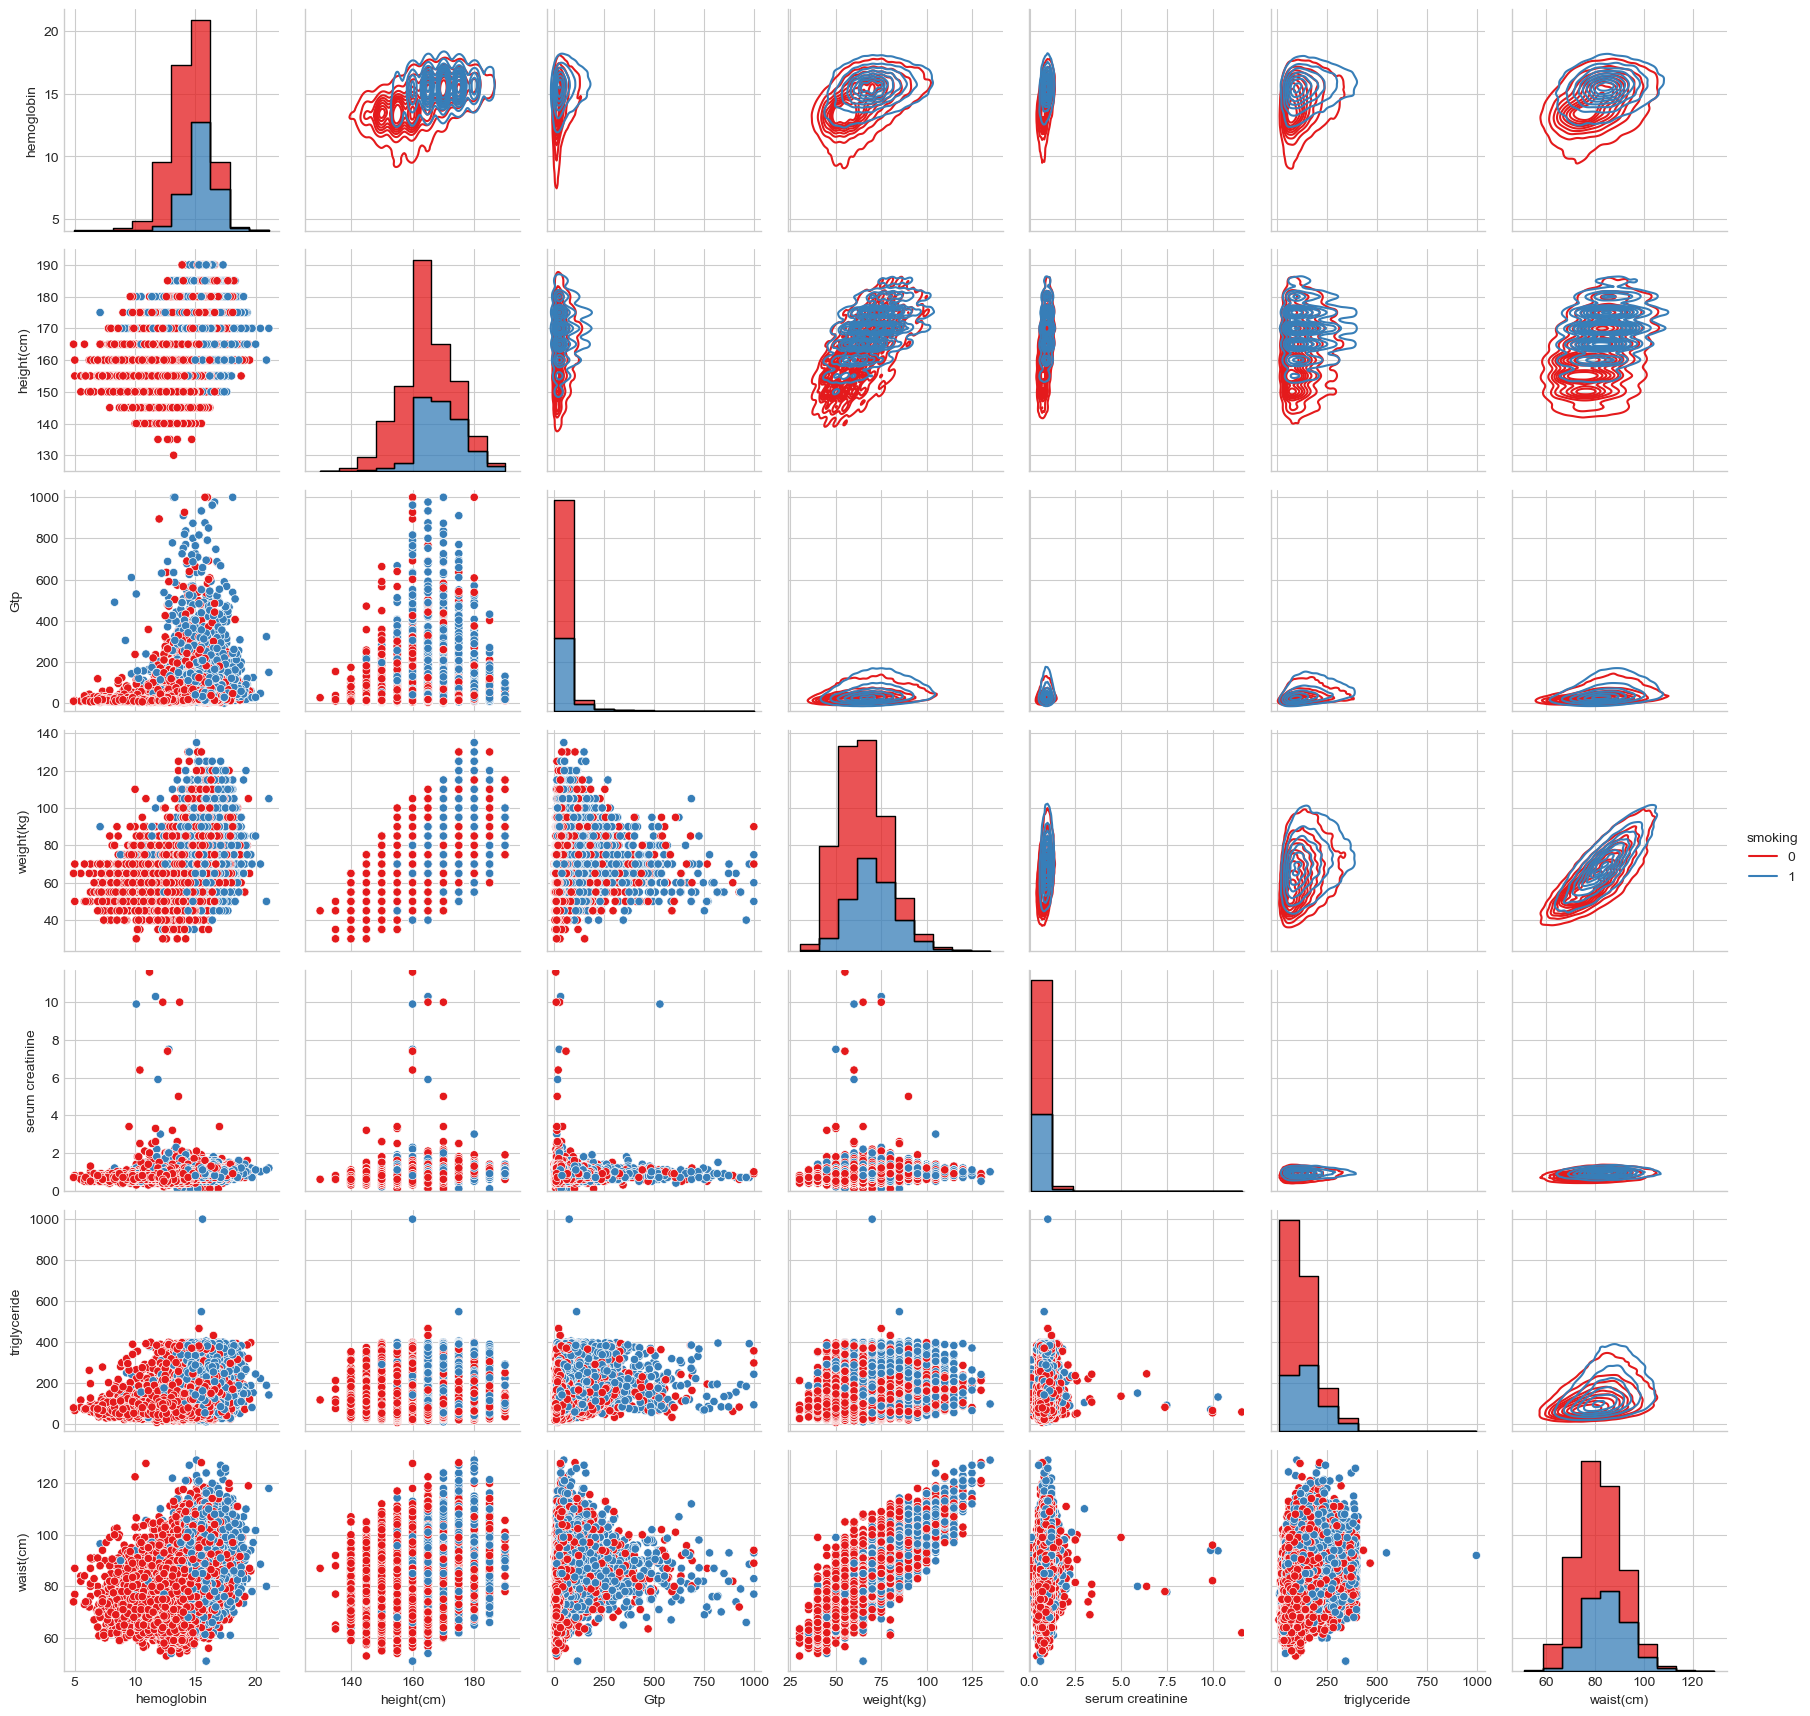

In [20]:
fig = plt.figure(figsize=(20,20))
cols = mi.index[1:8].to_list()

grid = sb.PairGrid(data=df, vars=cols, hue='smoking', palette='Set1', diag_sharey=False)
grid.map_lower(sb.scatterplot)
grid.map_diag(sb.histplot, bins=10, multiple='stack', element='step')
grid.map_upper(sb.kdeplot)
grid.add_legend()